In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
from xml.etree import ElementTree
import plotly.graph_objects as go
import plotly.express as px

In [5]:
#SL.EMP.MPYR.MA.ZS
male_employeer_ind = 'SL.EMP.MPYR.MA.ZS'
male_employeer_url = f'http://api.worldbank.org/v2/country/cr/indicator/{male_employeer_ind}?format=json'
male_employeer = requests.get(male_employeer_url)
male_employeer = male_employeer.json()[1:]

# get indicator name
male_employeer_name_ind = male_employeer[0][1]['indicator']['value']

# create dictionary and remove Nones
male_employeer_dict = {'year': [], f'{male_employeer_name_ind}': []}

for i in male_employeer[0]:
    #print(i['date'], i['value'])
    if i['value']:
        male_employeer_dict['year'].append(i['date'])
        male_employeer_dict[male_employeer_name_ind].append(i['value'])

df_male_employeer = pd.DataFrame.from_dict(data=male_employeer_dict)

In [6]:
#SL.EMP.MPYR.FE.ZS
female_employeer_ind = 'SL.EMP.MPYR.FE.ZS'
female_employeer_url = f'http://api.worldbank.org/v2/country/cr/indicator/{female_employeer_ind}?format=json'
female_employeer = requests.get(female_employeer_url)
female_employeer = female_employeer.json()[1:]

# get indicator name
female_employeer_name_ind = female_employeer[0][1]['indicator']['value']

# create dictionary and remove Nones
female_employeer_dict = {'year': [], f'{female_employeer_name_ind}': []}

for i in female_employeer[0]:
    #print(i['date'], i['value'])
    if i['value']:
        female_employeer_dict['year'].append(i['date'])
        female_employeer_dict[female_employeer_name_ind].append(i['value'])

df_female_employeer = pd.DataFrame.from_dict(data=female_employeer_dict)

In [7]:
#SL.EMP.MPYR.ZS
total_employeer_ind = 'SL.EMP.MPYR.ZS'
total_employeer_url = f'http://api.worldbank.org/v2/country/cr/indicator/{total_employeer_ind}?format=json'
total_employeer = requests.get(total_employeer_url)
total_employeer = total_employeer.json()[1:]

# get indicator name
total_employeer_name_ind = total_employeer[0][1]['indicator']['value']

total_employeer_dict = {'year': [], f'{total_employeer_name_ind}': []}

for i in total_employeer[0]:
    if i['value']:
        total_employeer_dict['year'].append(i['date'])
        total_employeer_dict[total_employeer_name_ind].append(i['value'])

df_total_employeer = pd.DataFrame.from_dict(data=total_employeer_dict)

In [8]:
merged_employment_by_gender = pd.merge(left=df_female_employeer, right=df_male_employeer, left_on='year', right_on='year')
merged_employment_total = pd.merge(left=merged_employment_by_gender, right=df_total_employeer, left_on='year', right_on='year')
total = merged_employment_total[f'{total_employeer_name_ind}'].sum()

In [123]:
#merged_employment_total

El siguiente grafico muestra la tendencia historica de la cantidad de empleadores mujeres y hombres en CR.

<AxesSubplot:xlabel='Factor', ylabel='Value'>

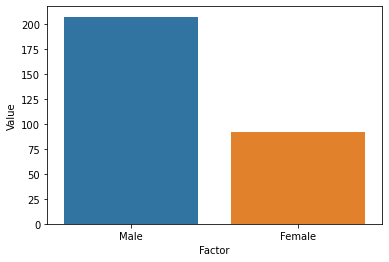

In [9]:
female = merged_employment_total[f'{female_employeer_name_ind}'].sum()
male = merged_employment_total[f'{male_employeer_name_ind}'].sum()
df = pd.DataFrame({'Factor': ['Male', 'Female'],'Value': [male, female]})
sns.barplot(x='Factor', y='Value', data=df)

El siguiente barchar muestra muestra los valores desde 1991 de la cantidad de empleadores en CR por genero. Se observa como la cantidad de emprendimientos se ha estado reduciendo para ambos generos y ademas como el genero masculino desafortunadamente posee una relacion historica de 2 a uno con respecto a las mujeres.

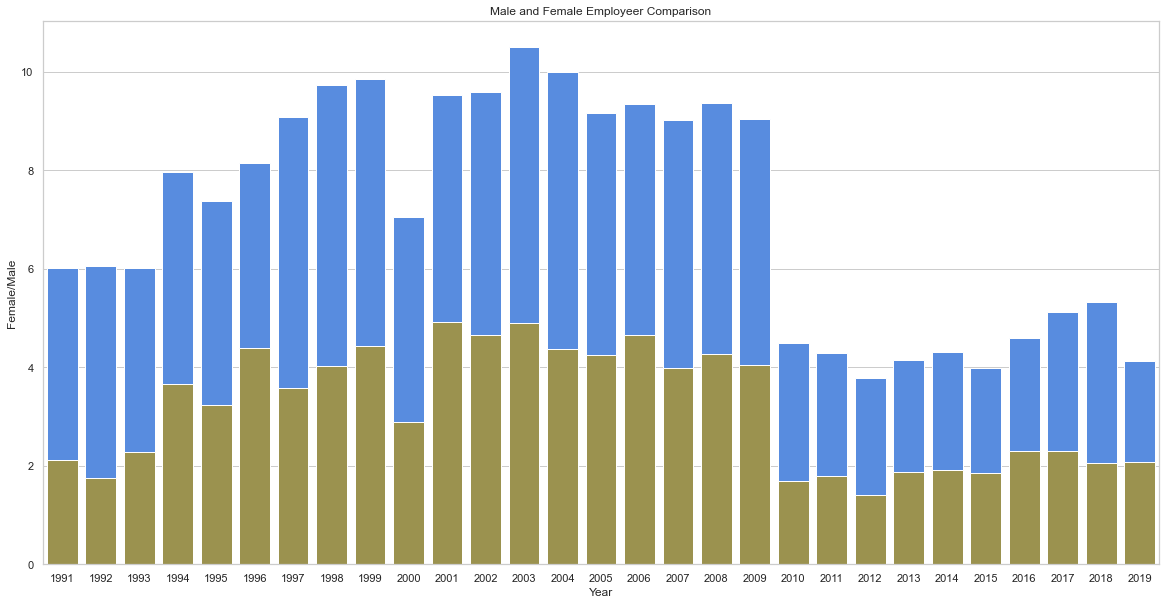

In [11]:
female = merged_employment_total[f'{female_employeer_name_ind}'].tolist()[::-1]
male = merged_employment_total[f'{male_employeer_name_ind}'].tolist()[::-1]
year = merged_employment_total[f'year'].tolist()[::-1]

df = pd.DataFrame({"Male": male,
                    "Female" : female,
                    "Year": year})

s1 = sns.barplot(x = 'Year', y = 'Male', data = df, color = '#4287f5')
s2 = sns.barplot(x = 'Year', y = 'Female', data = df, color = '#a89c42')
plt.ylabel('Female/Male')
plt.xlabel('Year')
plt.title('Male and Female Employeer Comparison')
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")

Los mismo que el anterior pero con visualizacion mas clara.

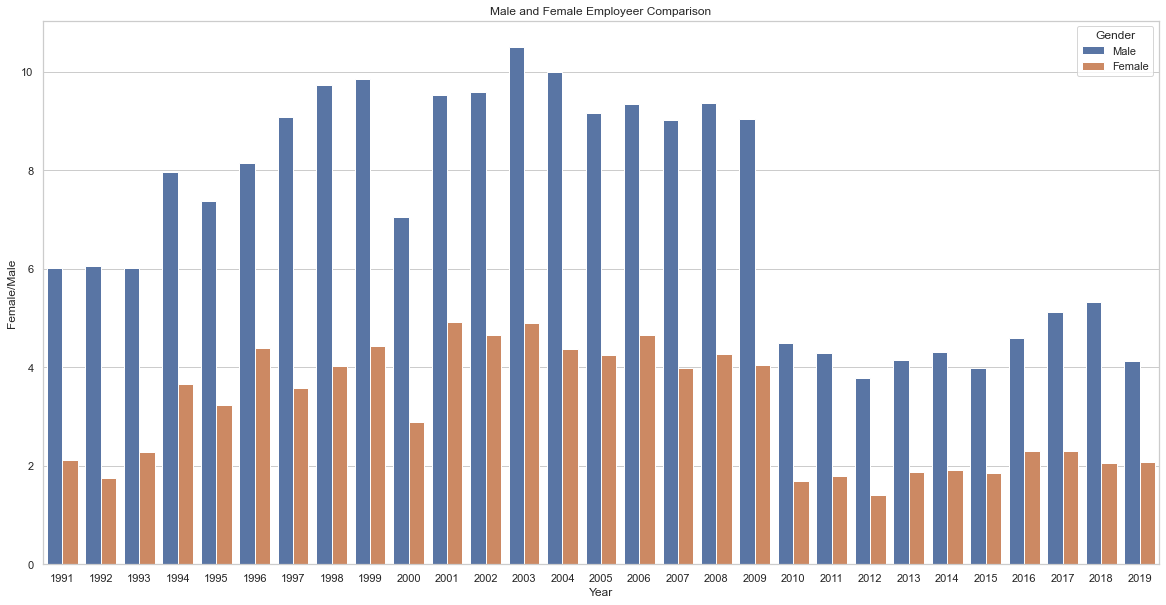

In [12]:
df_ = df.melt(id_vars=['Year'],value_vars=['Male', 'Female'], var_name=['Gender'])

sns.barplot(x ="Year", y = 'value', data = df_, hue = "Gender")
plt.ylabel('Female/Male')
plt.xlabel('Year')
plt.title('Male and Female Employeer Comparison')
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")

Se visualizan todas las muestras, donde las tendecias son claras.

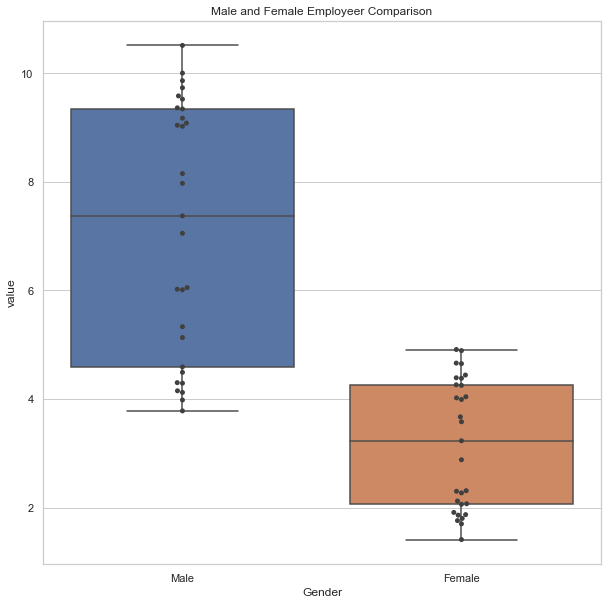

In [125]:
ax = sns.boxplot(x="Gender", y="value", data=df_)
sns.set(rc = {'figure.figsize':(10,10)})
plt.ylabel('Sample Values distribution')
plt.title('Male and Female Employeer Comparison')
ax = sns.swarmplot(x="Gender", y="value", data=df_, color=".25")
sns.set_theme(style="whitegrid")

# Merchandise Exports and Imports

Costa Rican Exports to high income countries

In [61]:
#TX.VAL.MRCH.HI.ZS
exports_high_income_ind = 'TX.VAL.MRCH.HI.ZS'
exports_high_income_url = f'http://api.worldbank.org/v2/country/cr/indicator/{exports_high_income_ind}?format=json'
exports_high_income = requests.get(exports_high_income_url)
exports_high_income = exports_high_income.json()[1:]

# get indicator name
exports_high_income_name_ind = exports_high_income[0][1]['indicator']['value']

# create dictionary and remove Nones
exports_high_income_dict = {'year': [], f'{exports_high_income_name_ind}': []}

for i in exports_high_income[0]:
    #print(i['date'], i['value'])
    if i['value']:
        exports_high_income_dict['year'].append(i['date'])
        exports_high_income_dict[exports_high_income_name_ind].append(i['value'])

df_exports_high_income = pd.DataFrame.from_dict(data=exports_high_income_dict)

Costa Rican Imports to high income countries

In [60]:
# TM.VAL.MRCH.HI.ZS
imports_high_income_ind = 'TM.VAL.MRCH.HI.ZS'
imports_high_income_url = f'http://api.worldbank.org/v2/country/cr/indicator/{imports_high_income_ind}?format=json'
imports_high_income = requests.get(imports_high_income_url)
imports_high_income = imports_high_income.json()[1:]

# get indicator name
imports_high_income_name_ind = imports_high_income[0][1]['indicator']['value']

# create dictionary and remove Nones
imports_high_income_dict = {'year': [], f'{imports_high_income_name_ind}': []}

for i in imports_high_income[0]:
    #print(i['date'], i['value'])
    if i['value']:
        imports_high_income_dict['year'].append(i['date'])
        imports_high_income_dict[imports_high_income_name_ind].append(i['value'])

df_imports_high_income = pd.DataFrame.from_dict(data=imports_high_income_dict)

In [74]:
exports_imports_highincome = pd.merge(left=df_imports_high_income, right=df_exports_high_income, left_on='year', right_on='year')
imports_high = exports_imports_highincome[f'{imports_high_income_name_ind}'].tolist()[::-1]
exports_high = exports_imports_highincome[f'{exports_high_income_name_ind}'].tolist()[::-1]
year = exports_imports_highincome[f'year'].tolist()[::-1]

df = pd.DataFrame({"Imports": imports_high, "Exports": exports_high, "Year": year})

df_dn = df.melt(id_vars=['Year'],value_vars=['Imports', 'Exports'], var_name=['Exports/Imports'])
df_dn['Income'] = pd.Series(["High_Income" for x in range(len(df_imports_high_income.index)*2)])
df_dn['Zone'] = pd.Series(["Develop Nations" for x in range(len(df_imports_high_income.index)*2)])
#df_dn.to_excel("output.xlsx")

Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports)

In [58]:
# TX.VAL.MRCH.R1.ZS
exports_east_asia_pacific_ind = 'TX.VAL.MRCH.R1.ZS'
exports_east_asia_pacific_url = f'http://api.worldbank.org/v2/country/cr/indicator/{exports_east_asia_pacific_ind}?format=json'
exports_east_asia_pacific = requests.get(exports_east_asia_pacific_url)
exports_east_asia_pacific = exports_east_asia_pacific.json()[1:]

# get indicator name
exports_east_asia_pacific_name_ind = exports_east_asia_pacific[0][1]['indicator']['value']

# create dictionary and remove Nones
exports_east_asia_pacific_dict = {'year': [], f'{exports_east_asia_pacific_name_ind}': []}

for i in exports_east_asia_pacific[0]:
    #print(i['date'], i['value'])
    if i['value']:
        exports_east_asia_pacific_dict['year'].append(i['date'])
        exports_east_asia_pacific_dict[exports_east_asia_pacific_name_ind].append(i['value'])

df_exports_east_asia_pacific = pd.DataFrame.from_dict(data=exports_east_asia_pacific_dict)

Merchandise imports from low- and middle-income economies in East Asia & Pacific (% of total merchandise imports)


In [57]:
# TM.VAL.MRCH.R1.ZS
imports_east_asia_pacific_ind = 'TM.VAL.MRCH.R1.ZS'
imports_east_asia_pacific_url = f'http://api.worldbank.org/v2/country/cr/indicator/{imports_east_asia_pacific_ind}?format=json'
imports_east_asia_pacific = requests.get(imports_east_asia_pacific_url)
imports_east_asia_pacific = imports_east_asia_pacific.json()[1:]

# get indicator name
imports_east_asia_pacific_name_ind = imports_east_asia_pacific[0][1]['indicator']['value']

# create dictionary and remove Nones
imports_east_asia_pacific_dict = {'year': [], f'{imports_east_asia_pacific_name_ind}': []}

for i in imports_east_asia_pacific[0]:
    #print(i['date'], i['value'])
    if i['value']:
        imports_east_asia_pacific_dict['year'].append(i['date'])
        imports_east_asia_pacific_dict[imports_east_asia_pacific_name_ind].append(i['value'])

df_imports_east_asia_pacific = pd.DataFrame.from_dict(data=imports_east_asia_pacific_dict)

In [56]:
exp_imp_asia_pacific_low_middle = pd.merge(left=df_imports_east_asia_pacific, right=df_exports_east_asia_pacific, left_on='year', right_on='year')
imports_low_middle = exp_imp_asia_pacific_low_middle[f'{imports_east_asia_pacific_name_ind}'].tolist()[::-1]
exports_low_middle = exp_imp_asia_pacific_low_middle[f'{exports_east_asia_pacific_name_ind}'].tolist()[::-1]
year = exp_imp_asia_pacific_low_middle[f'year'].tolist()[::-1]

df = pd.DataFrame({"Imports": imports_low_middle, "Exports": exports_low_middle, "Year": year})

df_apa = df.melt(id_vars=['Year'],value_vars=['Imports', 'Exports'], var_name=['Exports/Imports'])
df_apa['Income'] = pd.Series(["Low_Middle_Income" for x in range(len(df_imports_east_asia_pacific.index)*2)])
df_apa['Zone'] = pd.Series(["Asia_Pacific" for x in range(len(df_imports_east_asia_pacific.index)*2)])

Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)	TX.VAL.MRCH.R2.ZS

In [55]:
# TX.VAL.MRCH.R2.ZS
exports_eu_centralasia_ind = 'TX.VAL.MRCH.R2.ZS'
exports_eu_centralasia_url = f'http://api.worldbank.org/v2/country/cr/indicator/{exports_eu_centralasia_ind}?format=json'
exports_eu_centralasia = requests.get(exports_eu_centralasia_url)
exports_eu_centralasia = exports_eu_centralasia.json()[1:]

# get indicator name
exports_eu_centralasia_name_ind = exports_eu_centralasia[0][1]['indicator']['value']

# create dictionary and remove Nones
exports_eu_centralasia_dict = {'year': [], f'{exports_eu_centralasia_name_ind}': []}

for i in exports_eu_centralasia[0]:
    #print(i['date'], i['value'])
    if i['value']:
        exports_eu_centralasia_dict['year'].append(i['date'])
        exports_eu_centralasia_dict[exports_eu_centralasia_name_ind].append(i['value'])

df_exports_eu_centralasia = pd.DataFrame.from_dict(data=exports_eu_centralasia_dict)

Merchandise imports from low- and middle-income economies in East Asia & Pacific (% of total merchandise imports)	TM.VAL.MRCH.R2.ZS

In [79]:
# TM.VAL.MRCH.R2.ZS
imports_eu_centralasia_ind  = 'TM.VAL.MRCH.R2.ZS'
imports_eu_centralasia_url = f'http://api.worldbank.org/v2/country/cr/indicator/{imports_eu_centralasia_ind}?format=json'
imports_eu_centralasia = requests.get(imports_eu_centralasia_url)
imports_eu_centralasia = imports_eu_centralasia.json()[1:]

# get indicator name
imports_eu_centralasia_name_ind = imports_eu_centralasia[0][1]['indicator']['value']

# create dictionary and remove Nones
imports_eu_centralasia_dict = {'year': [], f'{imports_eu_centralasia_name_ind}': []}

for i in imports_eu_centralasia[0]:
    #print(i['date'], i['value'])
    if i['value']:
        imports_eu_centralasia_dict['year'].append(i['date'])
        imports_eu_centralasia_dict[imports_eu_centralasia_name_ind].append(i['value'])

df_imports_eu_centralasia = pd.DataFrame.from_dict(data=imports_eu_centralasia_dict)

In [80]:
exp_imp_eu_centralasia_low_middle = pd.merge(left=df_imports_eu_centralasia, right=df_exports_eu_centralasia, left_on='year', right_on='year')
imports_low_middle = exp_imp_eu_centralasia_low_middle[f'{imports_eu_centralasia_name_ind}'].tolist()[::-1]
exports_low_middle = exp_imp_eu_centralasia_low_middle[f'{exports_eu_centralasia_name_ind}'].tolist()[::-1]
year = exp_imp_eu_centralasia_low_middle[f'year'].tolist()[::-1]

df = pd.DataFrame({"Imports": imports_low_middle,
                     "Exports": exports_low_middle,
                     "Year": year})

df_eua = df.melt(id_vars=['Year'],value_vars=['Imports', 'Exports'], var_name=['Exports/Imports'])
df_eua['Income'] = pd.Series(["Low_Middle_Income" for x in range(len(df_imports_eu_centralasia.index)*2)])
df_eua['Zone'] = pd.Series(["Europe_CentralAsia" for x in range(len(df_imports_eu_centralasia.index)*2)])

Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports)	TM.VAL.MRCH.R3.ZS

In [52]:
# TM.VAL.MRCH.R3.ZS'
imports_latin_caribe_ind  = 'TM.VAL.MRCH.R3.ZS'
imports_latin_caribe_url = f'http://api.worldbank.org/v2/country/cr/indicator/{imports_latin_caribe_ind}?format=json'
imports_latin_caribe = requests.get(imports_latin_caribe_url)
imports_latin_caribe = imports_latin_caribe.json()[1:]

# get indicator name
imports_latin_caribe_name_ind = imports_latin_caribe[0][1]['indicator']['value']

# create dictionary and remove Nones
imports_latin_caribe_dict = {'year': [], f'{imports_latin_caribe_name_ind}': []}

for i in imports_latin_caribe[0]:
    #print(i['date'], i['value'])
    if i['value']:
        imports_latin_caribe_dict['year'].append(i['date'])
        imports_latin_caribe_dict[imports_latin_caribe_name_ind].append(i['value'])

df_imports_latin_caribe = pd.DataFrame.from_dict(data=imports_latin_caribe_dict)

Merchandise exports to low- and middle-income economies in Latin America & the Caribbean (% of total merchandise exports)	TX.VAL.MRCH.R3.ZS

In [51]:
# TX.VAL.MRCH.R3.ZS
exports_latin_caribe_ind  = 'TX.VAL.MRCH.R3.ZS'
exports_latin_caribe_url = f'http://api.worldbank.org/v2/country/cr/indicator/{exports_latin_caribe_ind}?format=json'
exports_latin_caribe = requests.get(exports_latin_caribe_url)
exports_latin_caribe = exports_latin_caribe.json()[1:]

# get indicator name
exports_latin_caribe_name_ind = exports_latin_caribe[0][1]['indicator']['value']

# create dictionary and remove Nones
exports_latin_caribe_dict = {'year': [], f'{exports_latin_caribe_name_ind}': []}

for i in exports_latin_caribe[0]:
    #print(i['date'], i['value'])
    if i['value']:
        exports_latin_caribe_dict['year'].append(i['date'])
        exports_latin_caribe_dict[exports_latin_caribe_name_ind].append(i['value'])

df_exports_latin_caribe = pd.DataFrame.from_dict(data=exports_latin_caribe_dict)

In [50]:
exp_imp_latin_caribe_low_middle = pd.merge(left=df_imports_latin_caribe, right=df_exports_latin_caribe, left_on='year', right_on='year')
imports_low_middle = exp_imp_latin_caribe_low_middle[f'{imports_latin_caribe_name_ind}'].tolist()[::-1]
exports_low_middle = exp_imp_latin_caribe_low_middle[f'{exports_latin_caribe_name_ind}'].tolist()[::-1]
year = exp_imp_latin_caribe_low_middle[f'year'].tolist()[::-1]

df = pd.DataFrame({"Imports": imports_low_middle,
                     "Exports": exports_low_middle,
                     "Year": year})
df_la = df.melt(id_vars=['Year'],value_vars=['Imports', 'Exports'], var_name=['Exports/Imports'])
df_la['Income'] = pd.Series(["Low_Middle_Income" for x in range(len(df_exports_latin_caribe.index)*2)])
df_la['Zone'] = pd.Series(["LatinAmerica_Caribe" for x in range(len(df_exports_latin_caribe.index)*2)])

Merchandise exports to low- and middle-income economies in South Asia (% of total merchandise exports)	TX.VAL.MRCH.R5.ZS

In [49]:
# TX.VAL.MRCH.R5.ZS
exports_south_asia_ind  = 'TX.VAL.MRCH.R5.ZS'
exports_south_asia_url = f'http://api.worldbank.org/v2/country/cr/indicator/{exports_south_asia_ind}?format=json'
exports_south_asia = requests.get(exports_south_asia_url)
exports_south_asia = exports_south_asia.json()[1:]

# get indicator name
exports_south_asia_name_ind = exports_south_asia[0][1]['indicator']['value']

# create dictionary and remove Nones
exports_south_asia_dict = {'year': [], f'{exports_south_asia_name_ind}': []}

for i in exports_south_asia[0]:
    #print(i['date'], i['value'])
    if i['value']:
        exports_south_asia_dict['year'].append(i['date'])
        exports_south_asia_dict[exports_south_asia_name_ind].append(i['value'])

df_exports_south_asia = pd.DataFrame.from_dict(data=exports_south_asia_dict)

Merchandise imports from low- and middle-income economies in South Asia (% of total merchandise imports)	TM.VAL.MRCH.R5.ZS

In [47]:
# TM.VAL.MRCH.R5.ZS
imports_south_asia_ind  = 'TM.VAL.MRCH.R5.ZS'
imports_south_asia_url = f'http://api.worldbank.org/v2/country/cr/indicator/{imports_south_asia_ind}?format=json'
imports_south_asia = requests.get(imports_south_asia_url)
imports_south_asia = imports_south_asia.json()[1:]

# get indicator name
imports_south_asia_name_ind = imports_south_asia[0][1]['indicator']['value']

# create dictionary and remove Nones
imports_south_asia_dict = {'year': [], f'{imports_south_asia_name_ind}': []}

for i in imports_south_asia[0]:
    #print(i['date'], i['value'])
    if i['value']:
        imports_south_asia_dict['year'].append(i['date'])
        imports_south_asia_dict[imports_south_asia_name_ind].append(i['value'])

df_imports_south_asia = pd.DataFrame.from_dict(data=imports_south_asia_dict)

In [86]:
exp_imp_south_asia_low_middle = pd.merge(left=df_imports_south_asia, right=df_exports_south_asia, left_on='year', right_on='year')
imports_low_middle = exp_imp_south_asia_low_middle[f'{imports_south_asia_name_ind}'].tolist()[::-1]
exports_low_middle = exp_imp_south_asia_low_middle[f'{exports_south_asia_name_ind}'].tolist()[::-1]
year = exp_imp_south_asia_low_middle[f'year'].tolist()[::-1]

df = pd.DataFrame({"Imports": imports_low_middle,
                     "Exports": exports_low_middle,
                     "Year": year})
df_sa = df.melt(id_vars=['Year'],value_vars=['Imports', 'Exports'], var_name=['Exports/Imports'])
df_sa['Income'] = pd.Series(["Low_Middle_Income" for x in range(len(df_exports_south_asia.index)*2)])
df_sa['Zone'] = pd.Series(["South_Asia" for x in range(len(df_exports_south_asia.index)*2)])

In [87]:
df = pd.concat([df_dn, df_apa, df_eua, df_la, df_sa], 
                keys=['Develop Nations', 
                        'Asia and Pacific', 
                        'Europe_Central_Asia',
                        'LatinAmerica_Caribe',
                        'South Asia'])

In [88]:
df.to_excel("output.xlsx",
             sheet_name='MerchandiseImportsExports')

Muestra general de las zonas donde CR exporta e importa mercansias.

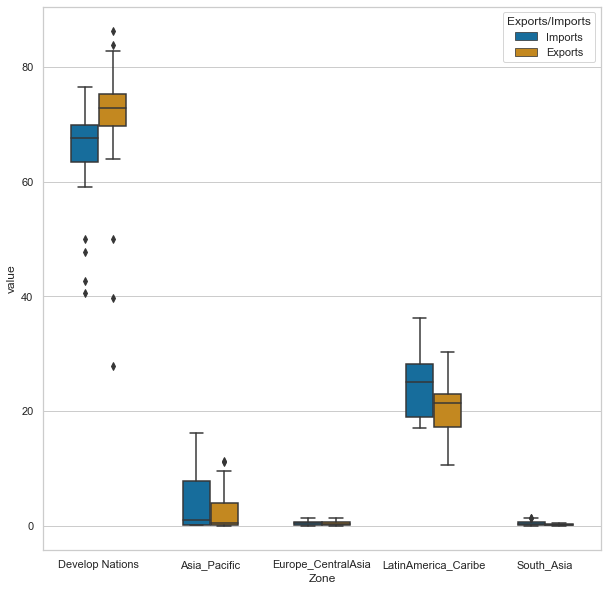

In [93]:
bplot = sns.boxplot(y='value', x='Zone', 
                 data=df, 
                 width=0.5,
                 palette="colorblind",
                 hue='Exports/Imports',
                 )

El box plot siguiente muestra el comportamiento como CR exporta e importa a las naciones Desarrolladas y de Baja / Medio Ingreso Economico. 
Algunas regiones de ingreso Bajo/medio en Europa y el Sur de Asia tiene valores muy por debajo de las naciones Desarrolladas y los vecinos Latinoamericanos.

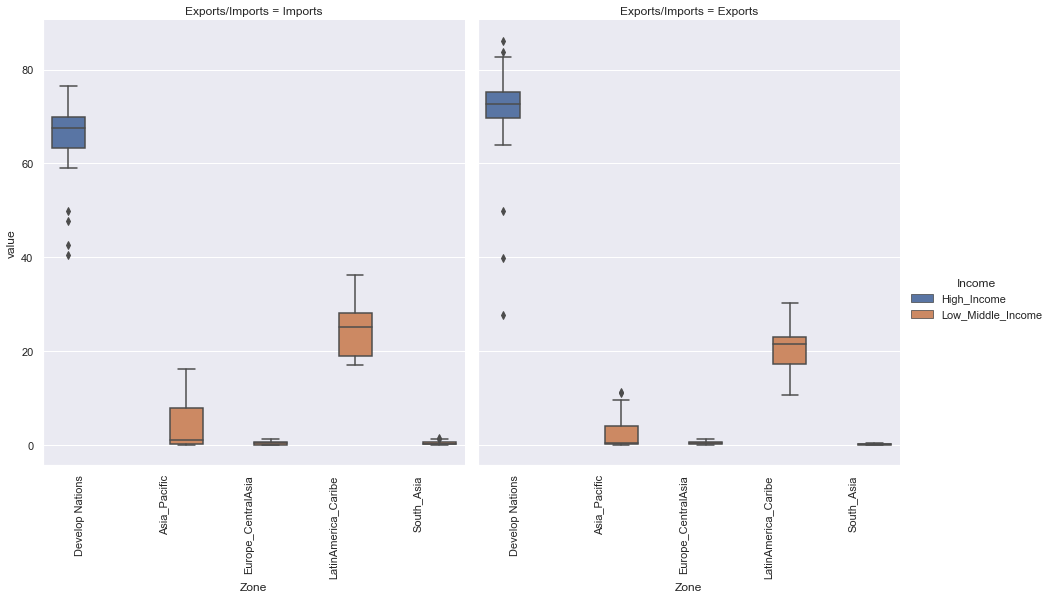

In [120]:
chart = sns.catplot(x="Zone", y="value",
                hue="Income", col="Exports/Imports",
                data=df, kind="box",
                height=10, aspect=.9)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

In [2]:
indicador='http://api.worldbank.org/v2/indicators/NY.GDP.MKTP.CD?format=json'
indicadorcr=requests.get(indicador)
#indicadorcr.json()
more_65='SP.POP.65UP.TO'
over_65_url = f'http://api.worldbank.org/v2/country/cr/indicator/{more_65}?format=json'
population_over_65= requests.get(over_65_url)
#Renewable_energy.json()[1:]
over65=population_over_65.json()[1:]

population_65= over65[0][1]['indicator']['value']

# create dictionary and remove Nones
population_over_65_dict = {'year': [], f'{population_65}': []}

for i in over65[0]:
    #print(i['date'], i['value'])
    if i['value']:
        population_over_65_dict['year'].append(i['date'])
        population_over_65_dict[population_65].append(i['value'])

df_population_o_65= pd.DataFrame.from_dict(data=population_over_65_dict)

In [3]:
populatio_15_64='SP.POP.1564.TO'
popu_15_64_url = f'http://api.worldbank.org/v2/country/cr/indicator/{populatio_15_64}?format=json'
population_15_64= requests.get(popu_15_64_url)
#Renewable_energy.json()[1:]
poblacion_15_64=population_15_64.json()[1:]

popula_15_64= poblacion_15_64[0][1]['indicator']['value']

# create dictionary and remove Nones
population_15_64_dict = {'year': [], f'{popula_15_64}': []}

for i in poblacion_15_64[0]:
    #print(i['date'], i['value'])
    if i['value']:
        population_15_64_dict['year'].append(i['date'])
        population_15_64_dict[popula_15_64].append(i['value'])

df_population_15_64= pd.DataFrame.from_dict(data=population_15_64_dict)

In [4]:
population_lt15='SP.POP.0014.TO'
popu_lt15_url = f'http://api.worldbank.org/v2/country/cr/indicator/{population_lt15}?format=json'
population_15= requests.get(popu_lt15_url)
#Renewable_energy.json()[1:]
poblacion_15=population_15.json()[1:]

popula_lt15= poblacion_15[0][1]['indicator']['value']

# create dictionary and remove Nones
population_lt15_dict = {'year': [], f'{popula_lt15}': []}

for i in poblacion_15[0]:
    #print(i['date'], i['value'])
    if i['value']:
        population_lt15_dict['year'].append(i['date'])
        population_lt15_dict[popula_lt15].append(i['value'])

df_population_lt15= pd.DataFrame.from_dict(data=population_lt15_dict)

In [5]:
Total_Population1=pd.merge(df_population_o_65,df_population_15_64, how='left')
Total_Population=pd.merge(Total_Population1,df_population_lt15,how='left')
Population_ages_65=Total_Population['Population ages 65 and above, total'].iloc[0:1]
Population_ages_15_64=Total_Population['Population ages 15-64, total'].iloc[0:1]
Population_ages_0_14=Total_Population['Population ages 0-14, total'].iloc[0:1]

In [6]:
data=[Population_ages_65[0],Population_ages_15_64[0],Population_ages_0_14[0]]
labels= 'Population over 65','Population 15-64','Population 0-14'
labels = ['Population over 65','Population 15-64','Population 0-14']
values = [Population_ages_65[0],Population_ages_15_64[0],Population_ages_0_14[0]]

fig = go.Figure(data=[go.Pie(labels=labels,textfont_size=15,
marker=dict(colors= ['#58D68D','#99ccff','#ccccff'], line=dict(color='#56564E ', width=2)), values=values,hole=0.3, pull=[0, 0.0, 0.2, 0])])
fig.update_layout(title_text="Population of Costa Rica by age")
fig.show()